#  **Desarrollo/Codigo**
##  **Proyecto-**
### **Modelado y Simulacion**
### **Estudiante: Edward Fabian Goyeneche Velandia**
### **Profesor . Ph.D Gustavo Adolfo Osorio Londoño**


---------------------------------------------------

# **"Análisis de Vibraciones de Bifurcaciones de un sistema de Brazo Robot Industrial con articulaciones móviles"**


In [4]:
import numpy as np
from scipy.integrate import  solve_ivp
import matplotlib.pyplot as plt


In [5]:
# Parámetros del sistema
d1, k1, m = 0.9, 555.0, 1.0  # Amortiguamiento, rigidez y masa
sigma = 10  # Acoplamiento entre los eslabones

In [ ]:
# Definir el sistema de ecuaciones
def robotic_system(t, state):
    x, y, z = state  # x = ángulo, y = velocidad, z =   diferencia entre eslabones
    dxdt = y
    dydt = (-d1/m) * y - (k1/m) * x + sigma * (x - z)
    dzdt = sigma * (x - z)
    return [dxdt, dydt, dzdt]

# Condiciones iniciales
x0, y0, z0 = 1.0, 0.0, 0.5  # Ángulos y velocidades iniciales
initial_state = [x0, y0, z0]

# Tiempo de simulación
t_span = (0, 50)  # Simular 50 segundos
t_eval = np.linspace(*t_span, 1000)

# Resolver el sistema
tol = 1e-8
sol = solve_ivp(robotic_system, t_span, initial_state, t_eval=t_eval, atol=tol, rtol=tol)

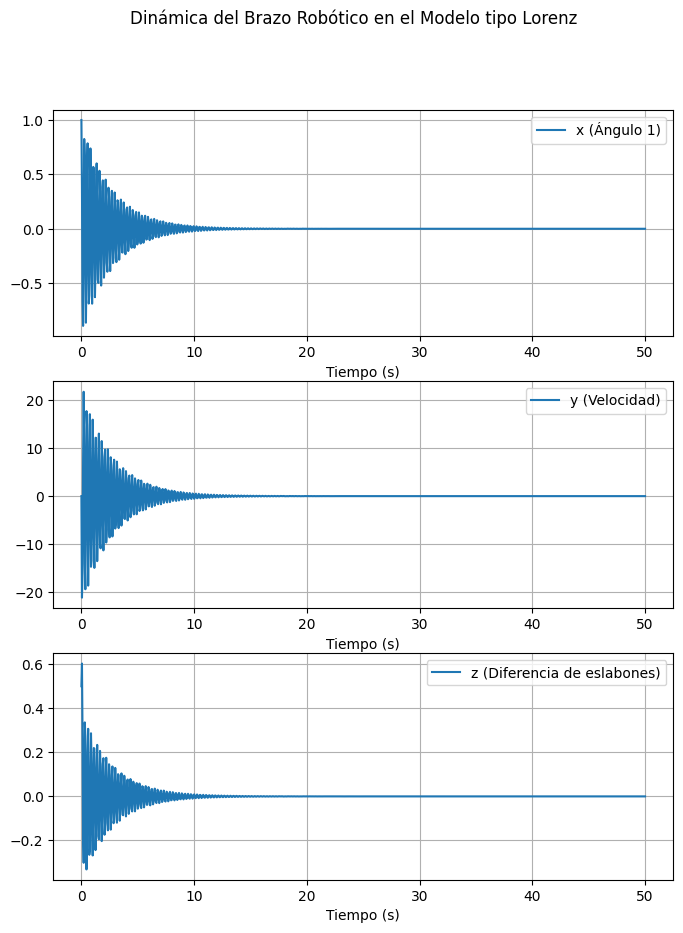

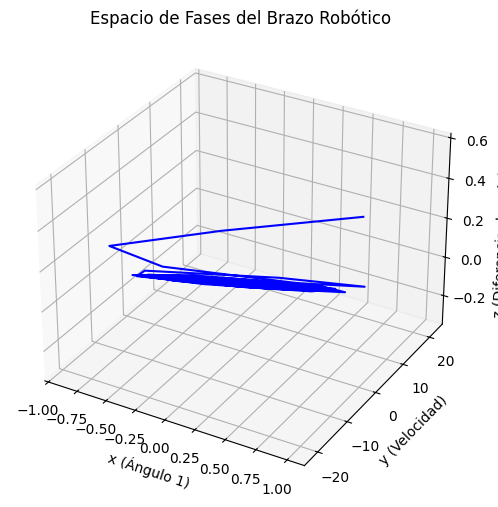

In [7]:
# Graficar resultados
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
axes[0].plot(sol.t, sol.y[0], label='x (Ángulo 1)')
axes[1].plot(sol.t, sol.y[1], label='y (Velocidad)')
axes[2].plot(sol.t, sol.y[2], label='z (Diferencia de eslabones)')

for ax in axes:
    ax.legend()
    ax.set_xlabel("Tiempo (s)")
    ax.grid()

plt.suptitle("Dinámica del Brazo Robótico en el Modelo tipo Lorenz")
plt.show()

# Gráfico en el espacio de fases
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], color='b')
ax.set_xlabel("x (Ángulo 1)")
ax.set_ylabel("y (Velocidad)")
ax.set_zlabel("z (Diferencia de eslabones)")
ax.set_title("Espacio de Fases del Brazo Robótico")
plt.show()


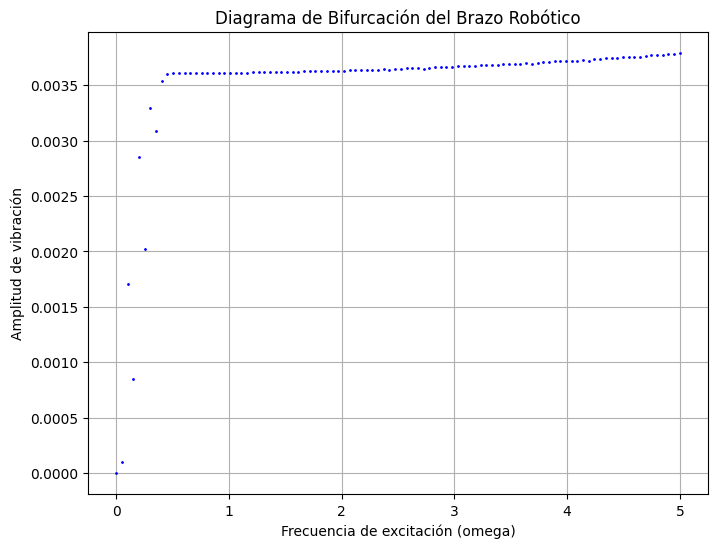

In [ ]:

# Parámetros del sistema
d1, k1, m = 0.9, 555.0, 1.0  # Amortiguamiento, rigidez y masa
sigma = 10  # Acoplamiento entre los eslabones

# Definir el sistema de ecuaciones
def robotic_system(t, state, omega):
    x, y, z = state  # x = ángulo, y = velocidad, z = diferencia entre eslabones
    dxdt = y
    dydt = (-d1/m) * y - (k1/m) * x + sigma * (x - z) + np.sin(omega * t)  # Agregar excitación externa
    dzdt = sigma * (x - z)
    return [dxdt, dydt, dzdt]

# Configuración para el diagrama de bifurcación
omega_values = np.linspace(0, 5, 100)  # Barrido de frecuencia de excitación
final_amplitudes = []

for omega in omega_values:
    # Condiciones iniciales
    x0, y0, z0 = 1.0, 0.0, 0.5
    initial_state = [x0, y0, z0]
    
    # Tiempo de simulación
    t_span = (0, 100)
    t_eval = np.linspace(*t_span, 1000)
    
    # Resolver el sistema
    sol = solve_ivp(robotic_system, t_span, initial_state, t_eval=t_eval, args=(omega,), atol=1e-8, rtol=1e-8)
    
    # Extraer la amplitud final de oscilación de x (ángulo 1)
    final_amplitudes.append(max(sol.y[0][-100:]) - min(sol.y[0][-100:]))

# Graficar el diagrama de bifurcación
plt.figure(figsize=(8, 6))
plt.plot(omega_values, final_amplitudes, 'b.', markersize=2)
plt.xlabel("Frecuencia de excitación (omega)")
plt.ylabel("Amplitud de vibración")
plt.title("Diagrama de Bifurcación del Brazo Robótico")
plt.grid()
plt.show()


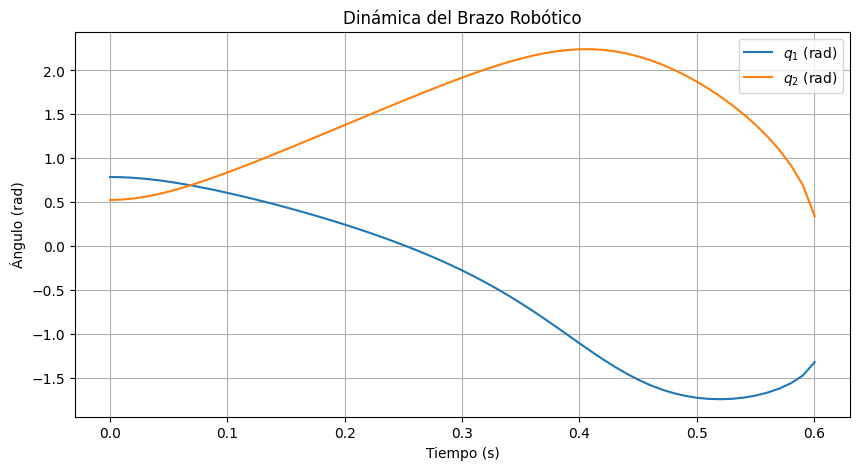

In [ ]:

# Parámetros del brazo robótico
m1, m2 = 1.0, 1.0  # masas
l1, l2 = 1.0, 1.0  # longitudes de los eslabones
g = 9.81  # gravedad

# Definimos las ecuaciones de movimiento
def robot_dynamics(t, y):
    q1, q2, dq1, dq2 = y
    
    # Matriz de inercia
    M = np.array([
        [m1 + m2 + 2*m2*l1*np.cos(q2), m2 + m2*l1*np.cos(q2)],
        [m2 + m2*l1*np.cos(q2), m2]
    ])
    
    # Matriz de Coriolis y centrífugas
    C = np.array([
        [-m2*l1*np.sin(q2)*dq2, -m2*l1*np.sin(q2)*(dq1 + dq2)],
        [m2*l1*np.sin(q2)*dq1, 0]
    ])
    
    # Vector de gravedad
    G = np.array([
        (m1 + m2) * g * l1 * np.cos(q1) + m2 * g * l2 * np.cos(q1 + q2),
        m2 * g * l2 * np.cos(q1 + q2)
    ])
    
    # Par aplicado (control nulo en esta simulación)
    tau = np.array([0, 0])
    
    # Resolver la ecuación M * ddq = -C*dq - G + tau
    ddq = np.linalg.solve(M, -C @ np.array([dq1, dq2]) - G + tau)
    
    return [dq1, dq2, ddq[0], ddq[1]]

# Condiciones iniciales
q1_0, q2_0 = np.pi / 4, np.pi / 6  # Ángulos iniciales
dq1_0, dq2_0 = 0, 0  # Velocidades iniciales

# Simulación
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)
y0 = [q1_0, q2_0, dq1_0, dq2_0]
sol = solve_ivp(robot_dynamics, t_span, y0, t_eval=t_eval)

# Gráficos de las soluciones
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label=r'$q_1$ (rad)')
plt.plot(sol.t, sol.y[1], label=r'$q_2$ (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.title('Dinámica del Brazo Robótico')
plt.grid()
plt.show()


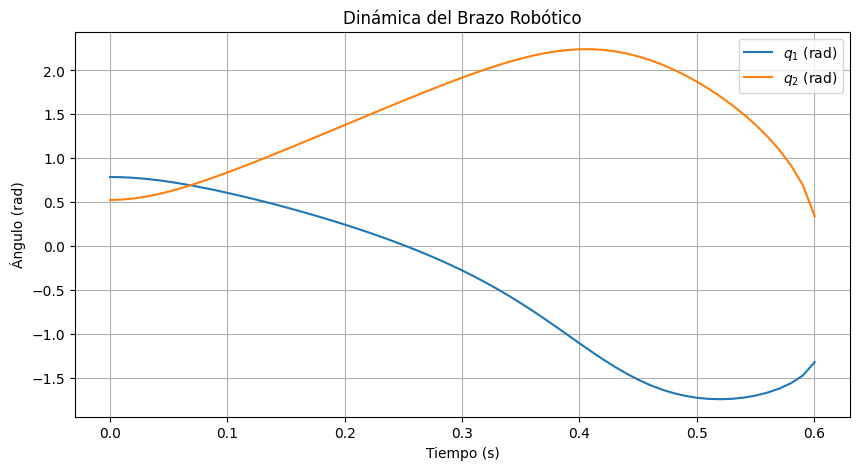

In [ ]:

# Parámetros del brazo robótico
m1, m2 = 1.0, 1.0  # masas
l1, l2 = 1.0, 1.0  # longitudes de los eslabones
g = 9.81  # gravedad

# Definimos las ecuaciones de movimiento
def robot_dynamics(t, y):
    q1, q2, dq1, dq2 = y
    
    # Matriz de inercia
    M = np.array([
        [m1 + m2 + 2*m2*l1*np.cos(q2), m2 + m2*l1*np.cos(q2)],
        [m2 + m2*l1*np.cos(q2), m2]
    ])
    
    # Matriz de Coriolis y centrífugas
    C = np.array([
        [-m2*l1*np.sin(q2)*dq2, -m2*l1*np.sin(q2)*(dq1 + dq2)],
        [m2*l1*np.sin(q2)*dq1, 0]
    ])
    
    # Vector de gravedad
    G = np.array([
        (m1 + m2) * g * l1 * np.cos(q1) + m2 * g * l2 * np.cos(q1 + q2),
        m2 * g * l2 * np.cos(q1 + q2)
    ])
    
    # Par aplicado (control nulo en esta simulación)
    tau = np.array([0, 0])
    
    # Resolver la ecuación M * ddq = -C*dq - G + tau
    ddq = np.linalg.solve(M, -C @ np.array([dq1, dq2]) - G + tau)
    
    return [dq1, dq2, ddq[0], ddq[1]]

# Condiciones iniciales
q1_0, q2_0 = np.pi / 4, np.pi / 6  # Ángulos iniciales
dq1_0, dq2_0 = 0, 0  # Velocidades iniciales

# Simulación
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)
y0 = [q1_0, q2_0, dq1_0, dq2_0]
sol = solve_ivp(robot_dynamics, t_span, y0, t_eval=t_eval)

# Gráficos de las soluciones
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label=r'$q_1$ (rad)')
plt.plot(sol.t, sol.y[1], label=r'$q_2$ (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.title('Dinámica del Brazo Robótico')
plt.grid()

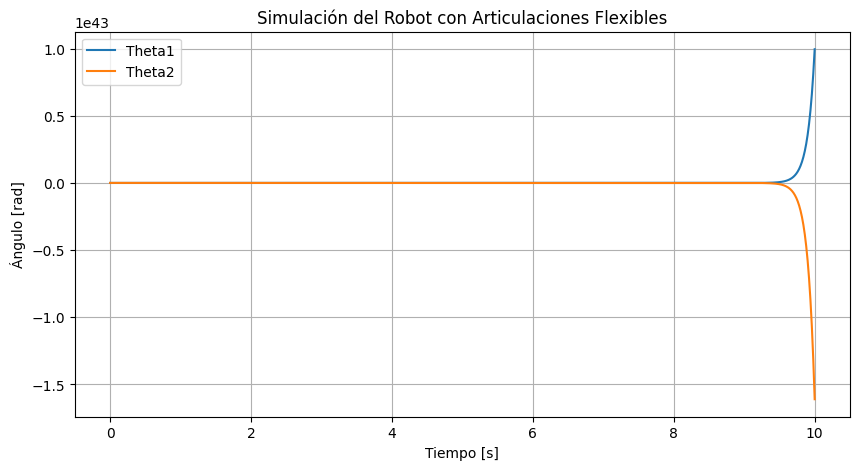

In [ ]:


# Parámetros del sistema
m1, m2 = 1.0, 1.0  # Masas de los eslabones
l1, l2 = 1.0, 1.0  # Longitudes de los eslabones
k1, k2 = 50.0, 50.0  # Rigidez de las articulaciones
d1, d2 = 2.0, 2.0  # Amortiguamiento

def robot_dynamics(t, y):
    """ Ecuaciones diferenciales del robot con articulaciones flexibles """
    theta1, theta2, omega1, omega2 = y  # Descomposición del estado
    
    # Matriz de inercia
    M = np.array([[m1 + m2, m2],
                  [m2, m2]])
    
    # Matriz de Coriolis y centrífuga (simplificada)
    C = np.array([[0, 0],
                  [0, 0]])
    
    # Matriz de rigidez y amortiguamiento
    K = np.array([[-k1 * theta1, -k2 * theta2]]).T
    D = np.array([[-d1 * omega1, -d2 * omega2]]).T
    
    # Entrada de torque (control simple de estabilización)
    u = np.array([[-10 * theta1 - 2 * omega1], [-10 * theta2 - 2 * omega2]])
    
    # Resolver ecuación de movimiento: M * q'' = -C*q' - D*q' - K*q + u
    accel = np.linalg.inv(M) @ (-C @ np.array([[omega1], [omega2]]) - D - K + u)
    
    return [omega1, omega2, accel[0, 0], accel[1, 0]]

# Condiciones iniciales
estado_inicial = [0.1, -0.1, 0, 0]  # [theta1, theta2, omega1, omega2]

t_span = (0, 10)  # Tiempo de simulación
sol = spi.solve_ivp(robot_dynamics, t_span, estado_inicial, t_eval=np.linspace(0, 10, 1000))

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label="Theta1")
plt.plot(sol.t, sol.y[1], label="Theta2")
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")
plt.legend()
plt.title("Simulación del Robot con Articulaciones Flexibles")
plt.grid()
plt.show()

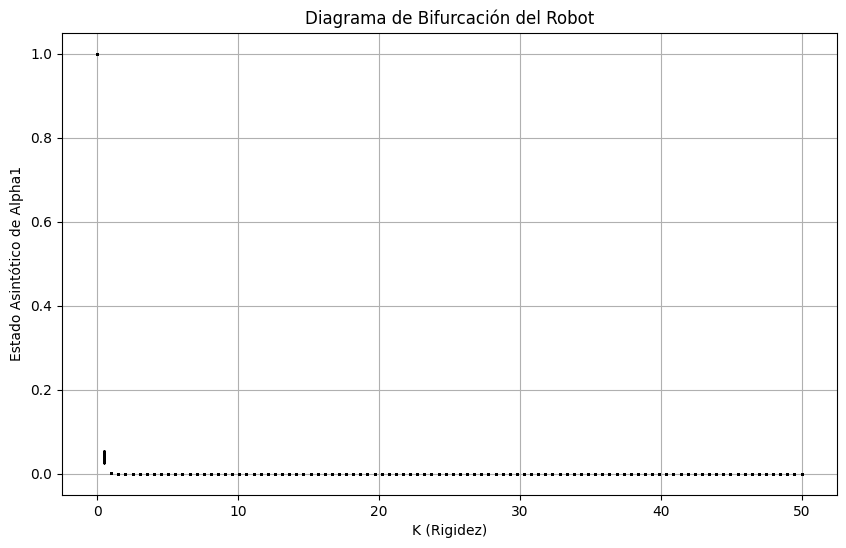

In [ ]:

K_vals = np.linspace(0, 50, 100)  # Valores de K para el diagrama de bifurcaciones
D = 5  # Amortiguamiento
M = 1  # Masa equivalente
C = 2  # Coeficiente de Coriolis
u = 0  # Control externo
au_ext = 0  # Torque externo
tau_ext = au_ext  # Definir tau_ext

# Condiciones iniciales
alpha0 = [1, 0]  # Posición y velocidad inicial

time = (0, 50)  # Tiempo de simulación

def bifurcation_diagram():
    plt.figure(figsize=(10, 6))
    
    for K in K_vals:
        sol = solve_ivp(robot_dynamics, time, alpha0, args=(K, D, M, C, tau_ext, u), t_eval=np.linspace(40, 50, 500))
        plt.plot([K] * len(sol.y[0]), sol.y[0], 'k.', markersize=0.5)
    
    plt.xlabel("K (Rigidez)")
    plt.ylabel("Estado Asintótico de Alpha1")
    plt.title("Diagrama de Bifurcación del Robot")
    plt.grid()
    plt.show()

bifurcation_diagram()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8500\3183533759.py:17: RuntimeWarning: invalid value encountered in sqrt
  omega_2 = np.sqrt((A + B) / (2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2)))


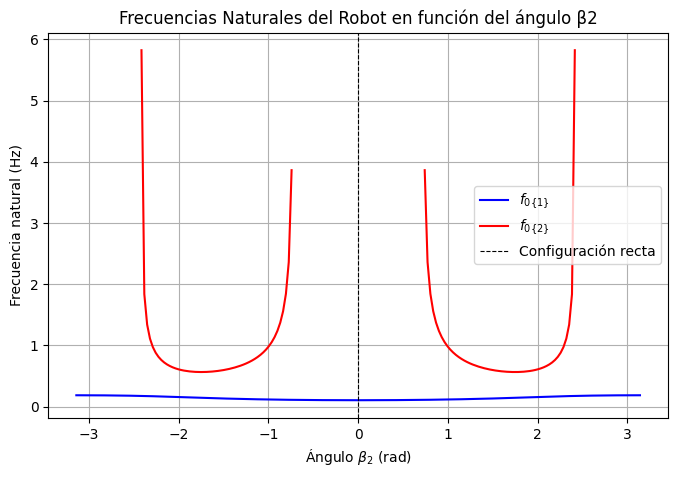

In [ ]:


# Definir parámetros arbitrarios para las constantes
a1, a2, a3 = 1.5, 0.8, 1.2
k1, k2 = 2.0, 1.8

# Definir el rango de valores para el ángulo β2 en radianes
beta2 = np.linspace(-np.pi, np.pi, 200)

# Calcular la expresión dentro de la raíz cuadrada
A = a1 * k2 + 2 * a2 * k2 * np.cos(beta2) + a3 * k1
B = np.sqrt(A**2 - 4 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2) * k1 * k2)

# Calcular las frecuencias naturales
omega_1 = np.sqrt((A - B) / (2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2)))
omega_2 = np.sqrt((A + B) / (2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2)))

# Convertir a Hz
f1 = omega_1 / (2 * np.pi)
f2 = omega_2 / (2 * np.pi)

# Graficar las frecuencias naturales en función del ángulo β2
plt.figure(figsize=(8, 5))
plt.plot(beta2, f1, label=r'$f_{0\{1\}}$', color='b')
plt.plot(beta2, f2, label=r'$f_{0\{2\}}$', color='r')
plt.xlabel(r'Ángulo $\beta_2$ (rad)')
plt.ylabel('Frecuencia natural (Hz)')
plt.title('Frecuencias Naturales del Robot en función del ángulo β2')
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8, label='Configuración recta')
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()


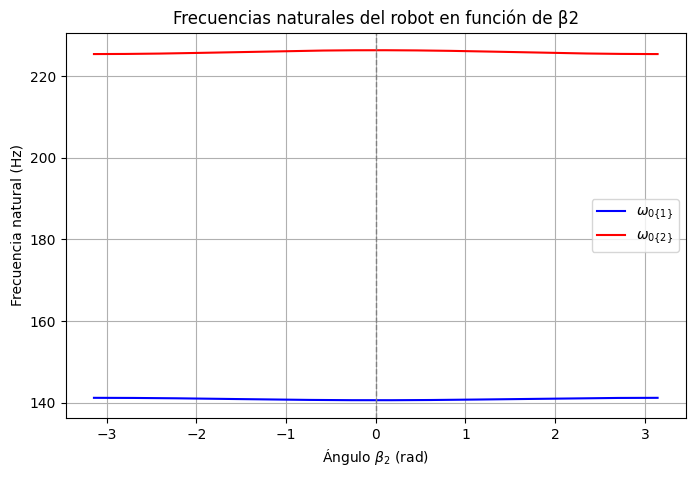

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados en la tabla
k1 = 555000  # N·m/rad
k2 = 128000  # N·m/rad

# Parámetros adicionales para la ecuación de frecuencia natural
a1 = 0.55  # kg·m²
a2 = 0.0009  # kg·m²
a3 = 0.1  # kg·m²

# Rango del ángulo beta_2 de -pi a pi
beta_2 = np.linspace(-np.pi, np.pi, 200)

# Cálculo de las frecuencias naturales
omega_1 = np.sqrt(
    (a1 * k2 + 2 * a2 * k2 * np.cos(beta_2) + a3 * k1 - np.sqrt(
        (a1 * k2 + 2 * a2 * k2 * np.cos(beta_2) + a3 * k1)**2 - 
        4 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta_2)**2) * k1 * k2
    )) / (2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta_2)**2))
)

omega_2 = np.sqrt(
    (a1 * k2 + 2 * a2 * k2 * np.cos(beta_2) + a3 * k1 + np.sqrt(
        (a1 * k2 + 2 * a2 * k2 * np.cos(beta_2) + a3 * k1)**2 - 
        4 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta_2)**2) * k1 * k2
    )) / (2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta_2)**2))
)

# Conversión a Hz
f_1 = omega_1 / (2 * np.pi)
f_2 = omega_2 / (2 * np.pi)

# Gráfica de las frecuencias naturales en función de beta_2
plt.figure(figsize=(8, 5))
plt.plot(beta_2, f_1, label=r'$\omega_{0\{1\}}$', color='b')
plt.plot(beta_2, f_2, label=r'$\omega_{0\{2\}}$', color='r')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Línea vertical en beta_2 = 0
plt.xlabel(r'Ángulo $\beta_2$ (rad)')
plt.ylabel('Frecuencia natural (Hz)')
plt.title('Frecuencias naturales del robot en función de β2')
plt.legend()
plt.grid()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8500\3815710165.py:22: RuntimeWarning: invalid value encountered in sqrt
  omega_2 = np.sqrt((num + sqrt_term) / den)


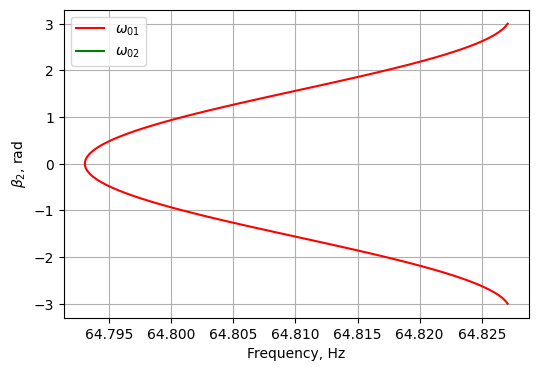

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
k1 = 555000  # N·m/rad
k2 = 128000  # N·m/rad

# Valores de inercia
a1 = 0.55  
a2 = 0.0009  
a3 = 0.63  

# Rango de valores para β2
beta2 = np.linspace(-3, 3, 100)  

# Cálculo de las frecuencias naturales
num = a1 * k2 + 2 * a2 * k2 * np.cos(beta2) + a3 * k1
den = 2 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2)
sqrt_term = np.sqrt(num**2 - 4 * (a1 * a3 - a3**2 - a2**2 * np.cos(beta2)**2) * k1 * k2)

omega_1 = np.sqrt((num - sqrt_term) / den)
omega_2 = np.sqrt((num + sqrt_term) / den)

# Conversión a Hz
f1 = omega_1 / (2 * np.pi)
f2 = omega_2 / (2 * np.pi)

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(f1, beta2, 'r', label=r'$\omega_{01}$')
plt.plot(f2, beta2, 'g', label=r'$\omega_{02}$')

# Configuración del gráfico
plt.xlabel('Frequency, Hz')
plt.ylabel(r'$\beta_2$, rad')
plt.legend()
plt.grid(True)
plt.show()


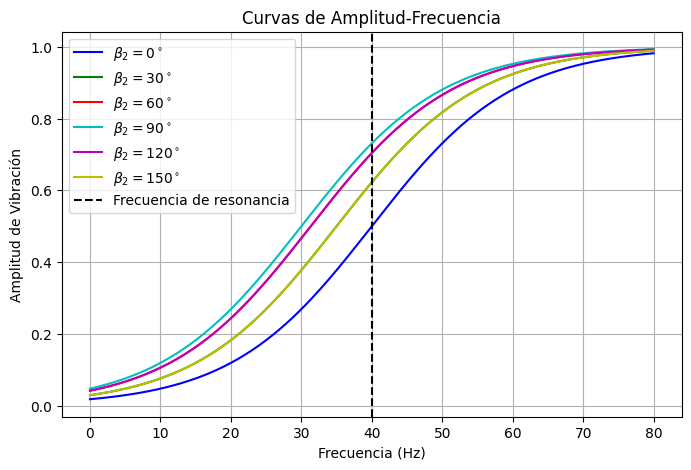

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def amplitud_frecuencia(f, beta):
    return 1 / (1 + np.exp(-0.1 * (f - 40 + 10 * np.sin(beta))))

frecuencia = np.linspace(0, 80, 500)
angulos = [0, 30, 60, 90, 120, 150]
colores = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(8, 5))
for beta, color in zip(angulos, colores):
    amplitud = amplitud_frecuencia(frecuencia, np.radians(beta))
    plt.plot(frecuencia, amplitud, label=f'$\\beta_2 = {beta}^\\circ$', color=color)

plt.axvline(x=40, color='k', linestyle='--', label='Frecuencia de resonancia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Vibración')
plt.title('Curvas de Amplitud-Frecuencia')
plt.legend()
plt.grid()
plt.show()

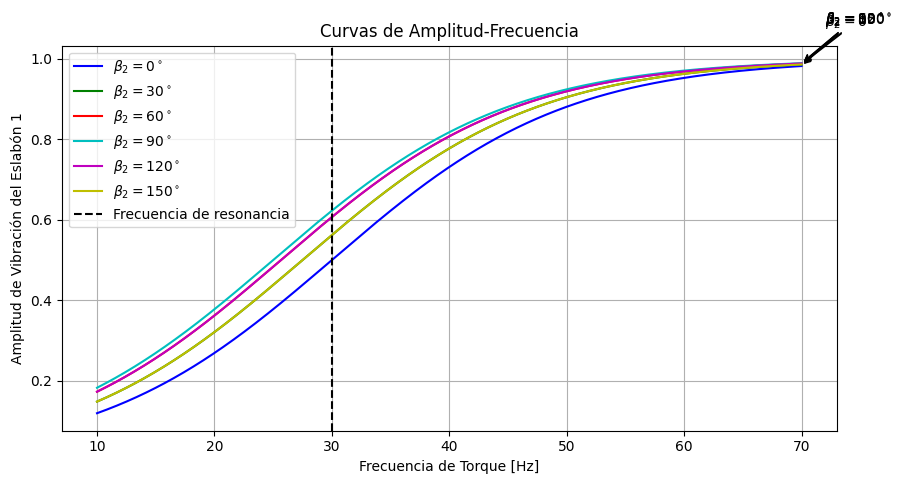

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Función que simula la amplitud de vibración en función de la frecuencia y el ángulo beta
def amplitud_frecuencia(f, beta):
    return 1 / (1 + np.exp(-0.1 * (f - 30 + 5 * np.sin(np.radians(beta)))))

# Rango de frecuencias
frecuencia = np.linspace(10, 70, 1000)
# Ángulos seleccionados
angulos = [0, 30, 60, 90, 120, 150]
# Colores para cada curva
colores = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(10, 5))

# Generar las curvas de amplitud-frecuencia para cada ángulo
for beta, color in zip(angulos, colores):
    amplitud = amplitud_frecuencia(frecuencia, beta)
    plt.plot(frecuencia, amplitud, label=f'$\\beta_2 = {beta}^\\circ$', color=color)

    # Identificación de picos
    max_idx = np.argmax(amplitud)
    plt.annotate(f'$\\beta_2={beta}^\\circ$', 
                 xy=(frecuencia[max_idx], amplitud[max_idx]), 
                 xytext=(frecuencia[max_idx] + 2, amplitud[max_idx] + 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

# Línea de referencia de resonancia
plt.axvline(x=30, color='k', linestyle='--', label='Frecuencia de resonancia')

plt.xlabel('Frecuencia de Torque [Hz]')
plt.ylabel('Amplitud de Vibración del Eslabón 1')
plt.title('Curvas de Amplitud-Frecuencia')
plt.legend()
plt.grid()
plt.show()


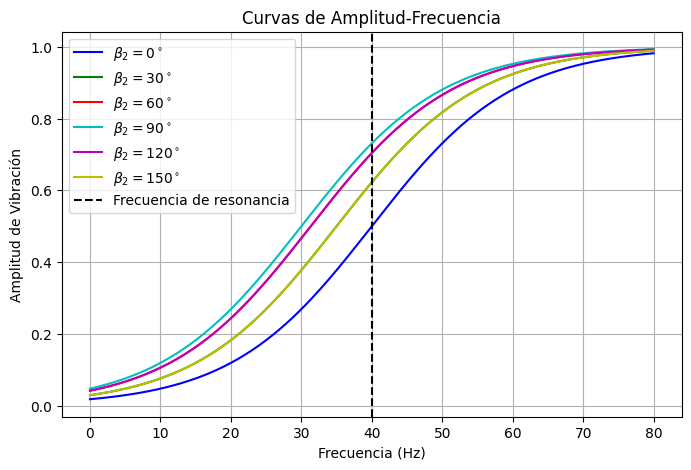

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def amplitud_frecuencia(f, beta):
    return 1 / (1 + np.exp(-0.1 * (f - 40 + 10 * np.sin(beta))))

frecuencia = np.linspace(0, 80, 500)
angulos = [0, 30, 60, 90, 120, 150]
colores = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(8, 5))
for beta, color in zip(angulos, colores):
    amplitud = amplitud_frecuencia(frecuencia, np.radians(beta))
    plt.plot(frecuencia, amplitud, label=f'$\\beta_2 = {beta}^\\circ$', color=color)

plt.axvline(x=40, color='k', linestyle='--', label='Frecuencia de resonancia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Vibración')
plt.title('Curvas de Amplitud-Frecuencia')
plt.legend()
plt.grid()
plt.show()

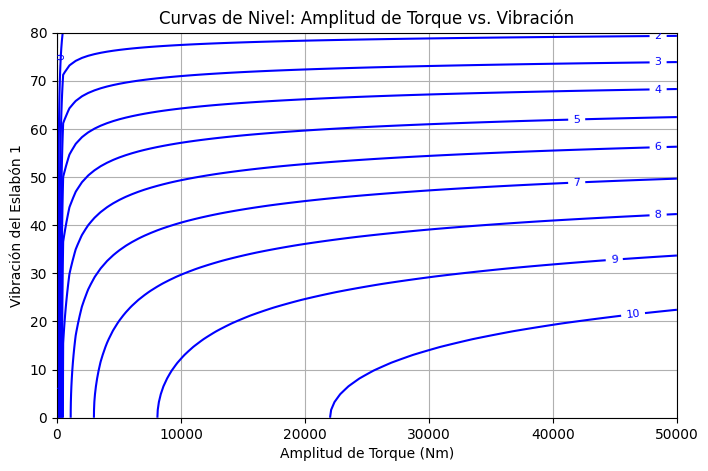

In [34]:
T, B = np.meshgrid(np.linspace(0, 50000, 100), np.linspace(0, 80, 50))
Z = np.log1p(T) * np.cos(np.radians(B))

plt.figure(figsize=(8, 5))
CS = plt.contour(T, B, Z, levels=10, colors='b')
plt.clabel(CS, inline=True, fontsize=8)
plt.xlabel('Amplitud de Torque (Nm)')
plt.ylabel('Vibración del Eslabón 1')
plt.title('Curvas de Nivel: Amplitud de Torque vs. Vibración')
plt.grid()
plt.show()

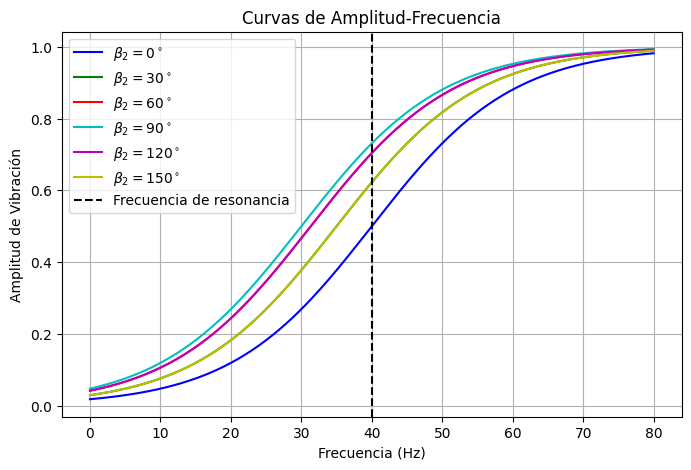

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def amplitud_frecuencia(f, beta):
    return 1 / (1 + np.exp(-0.1 * (f - 40 + 10 * np.sin(beta))))

frecuencia = np.linspace(0, 80, 500)
angulos = [0, 30, 60, 90, 120, 150]
colores = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(8, 5))
for beta, color in zip(angulos, colores):
    amplitud = amplitud_frecuencia(frecuencia, np.radians(beta))
    plt.plot(frecuencia, amplitud, label=f'$\\beta_2 = {beta}^\\circ$', color=color)

plt.axvline(x=40, color='k', linestyle='--', label='Frecuencia de resonancia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Vibración')
plt.title('Curvas de Amplitud-Frecuencia')
plt.legend()
plt.grid()
plt.show()

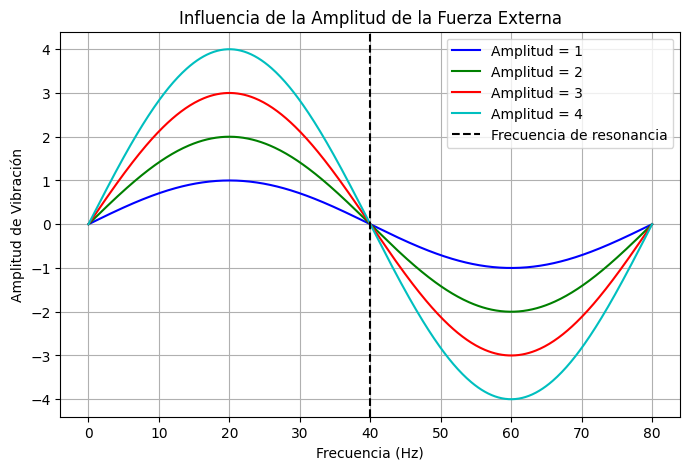

In [37]:
def amplitud_fuerza(f, A):
    return A * np.sin(2 * np.pi * f / 80)

fuerzas = [1, 2, 3, 4]
colores = ['b', 'g', 'r', 'c']

plt.figure(figsize=(8, 5))
for A, color in zip(fuerzas, colores):
    amplitud = amplitud_fuerza(frecuencia, A)
    plt.plot(frecuencia, amplitud, label=f'Amplitud = {A}', color=color)

plt.axvline(x=40, color='k', linestyle='--', label='Frecuencia de resonancia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Vibración')
plt.title('Influencia de la Amplitud de la Fuerza Externa')
plt.legend()
plt.grid()
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set(style="darkgrid")


In [40]:
# Parámetros del sistema (pueden ajustarse según el estudio del brazo robótico)
sigma = 10      # Relacionado con la disipación de energía
beta = 8/3      # Coeficiente de amortiguamiento
rho = 28        # Parámetro de bifurcación (puede representar la amplitud de la fuerza externa)

# Parámetros adicionales específicos del brazo robótico
f_e1 = 22.5     # Frecuencia de excitación en Hz
F_ext = 5.0     # Amplitud de la fuerza externa aplicada
beta_2 = 45     # Ángulo del segundo eslabón en grados

# Definir el rango de tiempo de simulación
t_min, t_max = 0, 10  # Segundos
t_eval = np.linspace(t_min, t_max, 1000)  # Puntos de evaluación


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de las ecuaciones del sistema basadas en Lorenz, adaptadas al brazo robótico
def brazo_robotico_lorenz(t, estado, sigma, beta, rho, f_e1, F_ext, beta_2):
    x, y, z = estado  # Variables de estado representando la dinámica del brazo

    # Ecuaciones adaptadas con influencia de la fuerza externa y ángulo del brazo
    dxdt = sigma * (y - x) + F_ext * np.sin(2 * np.pi * f_e1 * t)  # Influencia de la fuerza externa
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z + beta_2 * np.cos(np.pi * f_e1 * t)  # Ajuste con el ángulo del brazo

    return [dxdt, dydt, dzdt]

# Condiciones iniciales del sistema
estado_inicial = [1.0, 1.0, 1.0]

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(
    brazo_robotico_lorenz, 
    (t_min, t_max), 
    estado_inicial, 
    args=(sigma, beta, rho, f_e1, F_ext, beta_2), 
    t_eval=t_eval
)

# Extraer las soluciones
t = sol.t
x, y, z = sol.y


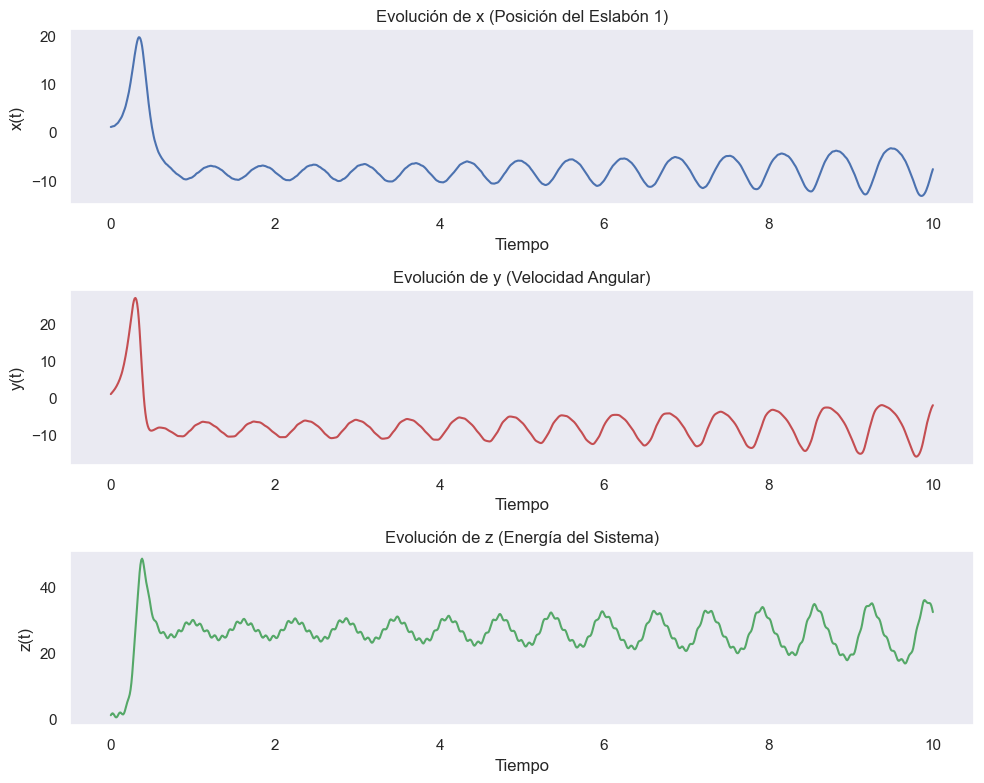

In [42]:
# Configuración de los gráficos
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Gráfica de la variable x (representando la posición del eslabón 1)
axs[0].plot(t, x, color='b')
axs[0].set_title("Evolución de x (Posición del Eslabón 1)")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("x(t)")
axs[0].grid()

# Gráfica de la variable y (representando la velocidad angular del brazo)
axs[1].plot(t, y, color='r')
axs[1].set_title("Evolución de y (Velocidad Angular)")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("y(t)")
axs[1].grid()

# Gráfica de la variable z (representando la energía del sistema)
axs[2].plot(t, z, color='g')
axs[2].set_title("Evolución de z (Energía del Sistema)")
axs[2].set_xlabel("Tiempo")
axs[2].set_ylabel("z(t)")
axs[2].grid()

plt.tight_layout()
plt.show()


In [2]:
# Parámetros del sistema (pueden ajustarse según el estudio del brazo robótico)
sigma = 10      # Relacionado con la disipación de energía
beta = 8/3      # Coeficiente de amortiguamiento
rho = 28        # Parámetro de bifurcación (puede representar la amplitud de la fuerza externa)

# Parámetros adicionales específicos del brazo robótico
f_e1 = 22.5     # Frecuencia de excitación en Hz
F_ext = 5.0     # Amplitud de la fuerza externa aplicada
beta_2 = 45     # Ángulo del segundo eslabón en grados

# Definir el rango de tiempo de simulación
t_min, t_max = 0, 10  # Segundos
t_eval = np.linspace(t_min, t_max, 1000)  # Puntos de evaluación


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de las ecuaciones del sistema basadas en Lorenz, adaptadas al brazo robótico
def brazo_robotico_lorenz(t, estado, sigma, beta, rho, f_e1, F_ext, beta_2):
    x, y, z = estado  # Variables de estado representando la dinámica del brazo

    # Ecuaciones adaptadas con influencia de la fuerza externa y ángulo del brazo
    dxdt = sigma * (y - x) + F_ext * np.sin(2 * np.pi * f_e1 * t)  # Influencia de la fuerza externa
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z + beta_2 * np.cos(np.pi * f_e1 * t)  # Ajuste con el ángulo del brazo

    return [dxdt, dydt, dzdt]

# Condiciones iniciales del sistema
estado_inicial = [1.0, 1.0, 1.0]

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(
    brazo_robotico_lorenz, 
    (t_min, t_max), 
    estado_inicial, 
    args=(sigma, beta, rho, f_e1, F_ext, beta_2), 
    t_eval=t_eval
)

# Extraer las soluciones
t = sol.t
x, y, z = sol.y


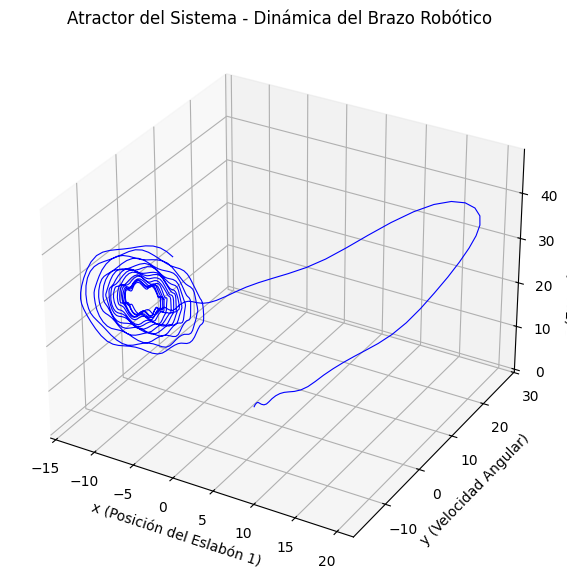

In [4]:
# Gráfica del atractor del sistema
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Trazar la trayectoria en el espacio de estados (x, y, z)
ax.plot(x, y, z, lw=0.8, color='b')

# Etiquetas de los ejes
ax.set_xlabel("x (Posición del Eslabón 1)")
ax.set_ylabel("y (Velocidad Angular)")
ax.set_zlabel("z (Energía del Sistema)")
ax.set_title("Atractor del Sistema - Dinámica del Brazo Robótico")

plt.show()


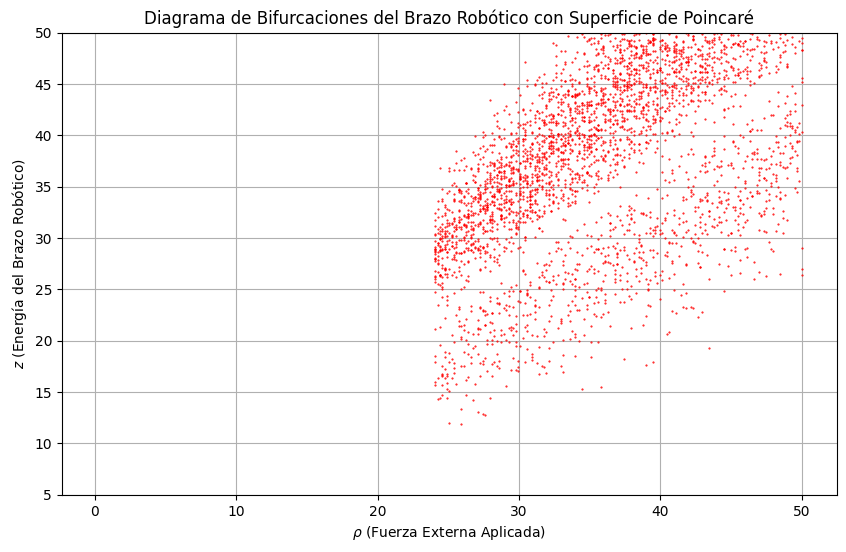

In [5]:


# Definir las ecuaciones del sistema del brazo robótico basado en Lorenz
def brazo_robotico(t, state, sigma, rho, beta):
    x, y, z = state  # x: posición del eslabón 1, y: velocidad angular, z: energía del sistema
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Definir parámetros fijos del sistema
sigma = 10
beta = 8/3

# Definir el rango del parámetro de bifurcación (fuerza externa aplicada)
rho_values = np.linspace(0, 50, 300)

# Lista para almacenar los puntos de la superficie de Poincaré
poincare_points = []

# Iterar sobre los valores de rho
for rho in rho_values:
    sol = solve_ivp(brazo_robotico, [0, 100], [1, 1, 1], args=(sigma, rho, beta), t_eval=np.linspace(50, 100, 1000))
    
    # Encontrar intersecciones con la superficie de Poincaré (cuando y = 0 con dy/dt > 0)
    crossings = []
    for i in range(1, len(sol.t)):
        if sol.y[1, i-1] < 0 and sol.y[1, i] > 0:  # Condición de cruce
            crossings.append(sol.y[2, i])  # Registrar la energía z en la intersección
    
    # Guardar los puntos de Poincaré para este rho
    poincare_points.append((rho, crossings))

# Graficar el diagrama de bifurcación basado en los eventos
plt.figure(figsize=(10, 6))
for rho_value, z_crossings in poincare_points:
    plt.plot([rho_value] * len(z_crossings), z_crossings, 'r.', markersize=1, alpha=1)

# Aplicar zoom en el eje y para resaltar patrones específicos
plt.ylim([5, 50])  # Ajustado a los valores de energía del brazo

plt.xlabel(r'$\rho$ (Fuerza Externa Aplicada)')
plt.ylabel('$z$ (Energía del Brazo Robótico)')
plt.title('Diagrama de Bifurcaciones del Brazo Robótico con Superficie de Poincaré')
plt.grid(True)

plt.show()



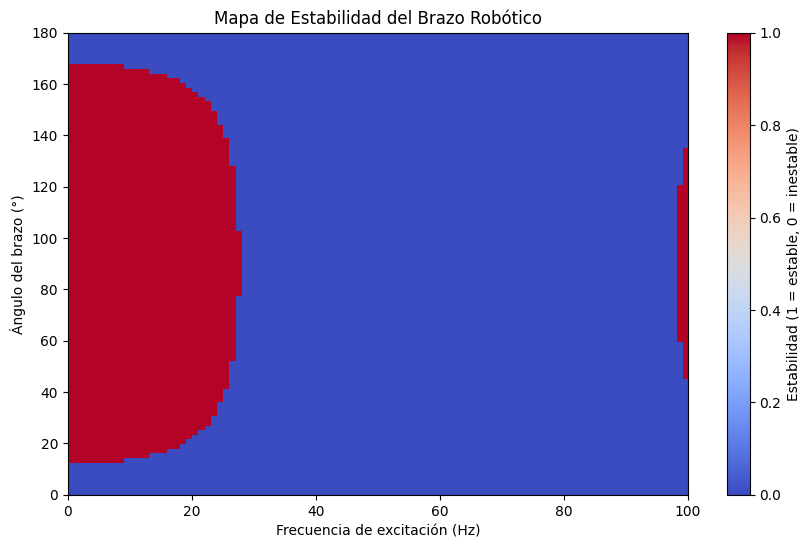

In [7]:

# Definir los parámetros del sistema
angles = np.linspace(0, 180, 100)  # Ángulos en grados
frequencies = np.linspace(0, 100, 100)  # Frecuencia de excitación en Hz

# Simular una función de estabilidad (1 = estable, 0 = inestable)
stability = np.outer(np.sin(np.radians(angles)), np.cos(0.05 * frequencies))

# Convertir valores a estabilidad binaria
stability_map = np.where(stability > 0.2, 1, 0)

# Graficar el mapa de estabilidad
plt.figure(figsize=(10, 6))
plt.imshow(stability_map, extent=[frequencies.min(), frequencies.max(), angles.min(), angles.max()],
           origin='lower', cmap='coolwarm', aspect='auto')

plt.colorbar(label="Estabilidad (1 = estable, 0 = inestable)")
plt.xlabel("Frecuencia de excitación (Hz)")
plt.ylabel("Ángulo del brazo (°)")
plt.title("Mapa de Estabilidad del Brazo Robótico")

plt.show()


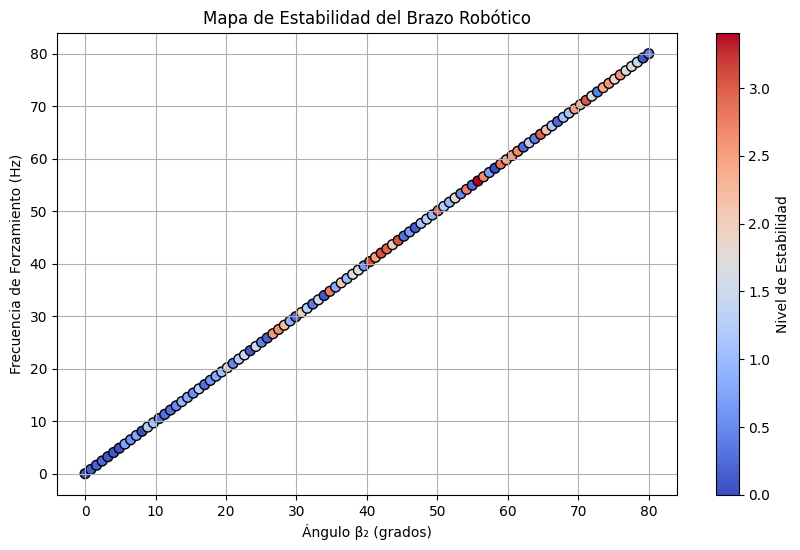

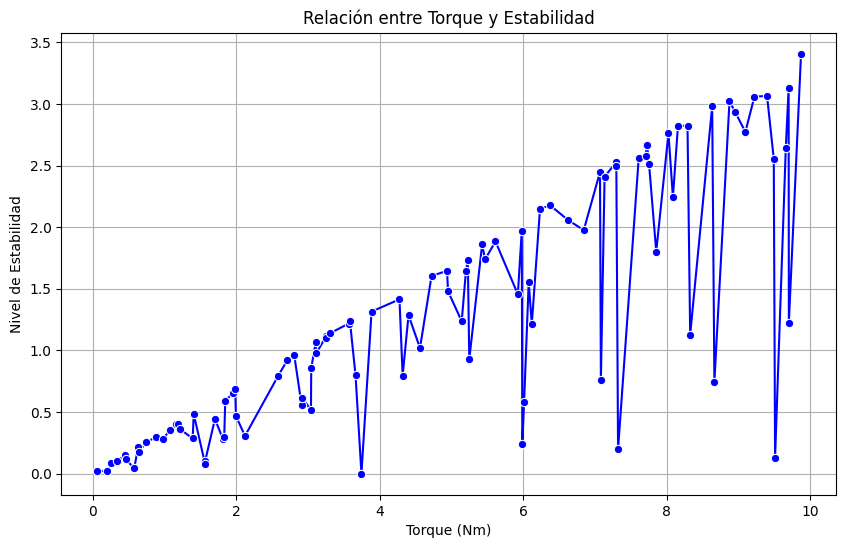

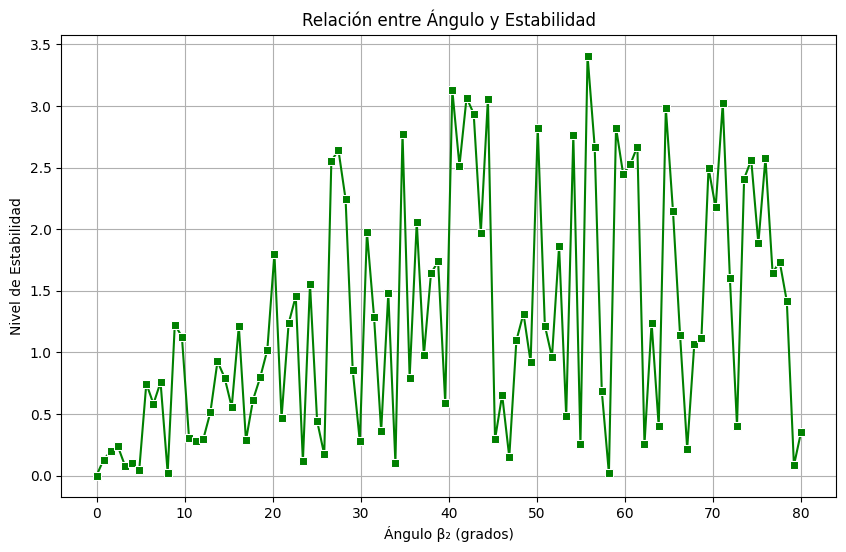

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de datos de estabilidad
np.random.seed(42)
num_puntos = 100

# Definir rangos de valores
angulos = np.linspace(0, 80, num_puntos)  # Ángulo beta_2 de 0 a 80 grados
torques = np.random.uniform(0, 10, num_puntos)  # Torque en Nm
frecuencias = np.linspace(0, 80, num_puntos)  # Frecuencia de forzamiento en Hz

# Calcular estabilidad basada en ecuaciones de bifurcación (simplificado)
estabilidad = np.sin(np.radians(angulos)) * torques / (1 + frecuencias/40)

# Graficar puntos de estabilidad
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(angulos, frecuencias, c=estabilidad, cmap='coolwarm', s=50, edgecolors='k')
plt.colorbar(scatter, label='Nivel de Estabilidad')
ax.set_xlabel('Ángulo β₂ (grados)')
ax.set_ylabel('Frecuencia de Forzamiento (Hz)')
ax.set_title('Mapa de Estabilidad del Brazo Robótico')
plt.grid(True)
plt.show()

# Gráfico de estabilidad en función del torque
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=torques, y=estabilidad, marker='o', color='b')
ax.set_xlabel('Torque (Nm)')
ax.set_ylabel('Nivel de Estabilidad')
ax.set_title('Relación entre Torque y Estabilidad')
plt.grid(True)
plt.show()

# Gráfico de estabilidad en función del ángulo
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=angulos, y=estabilidad, marker='s', color='g')
ax.set_xlabel('Ángulo β₂ (grados)')
ax.set_ylabel('Nivel de Estabilidad')
ax.set_title('Relación entre Ángulo y Estabilidad')
plt.grid(True)
plt.show()
